In [11]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns

In [2]:
# Loading Data
iris = load_iris()
X = iris.data[:, [0, 3]] # sepal length and petal width
y = iris.target

In [3]:
# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [4]:
lr = LogisticRegression(penalty='l2',
                        dual=False,
                        tol=0.000001,
                        C=10.0,
                        fit_intercept=True,
                        intercept_scaling=1,
                        class_weight=None,
                        random_state=1,
                        solver='newton-cg',
                        max_iter=100,
                        multi_class='multinomial',
                        verbose=0,
                        warm_start=False,
                        n_jobs=1)
lr.fit(X, y)

LogisticRegression(C=10.0, multi_class='multinomial', n_jobs=1, random_state=1,
                   solver='newton-cg', tol=1e-06)

In [5]:
y_pred = lr.predict(X)
print('Last 3 Class Labels: %s' % y_pred[-3:])

Last 3 Class Labels: [2 2 2]


In [7]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.96      0.94        50
           2       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



Text(95.72222222222221, 0.5, 'True')

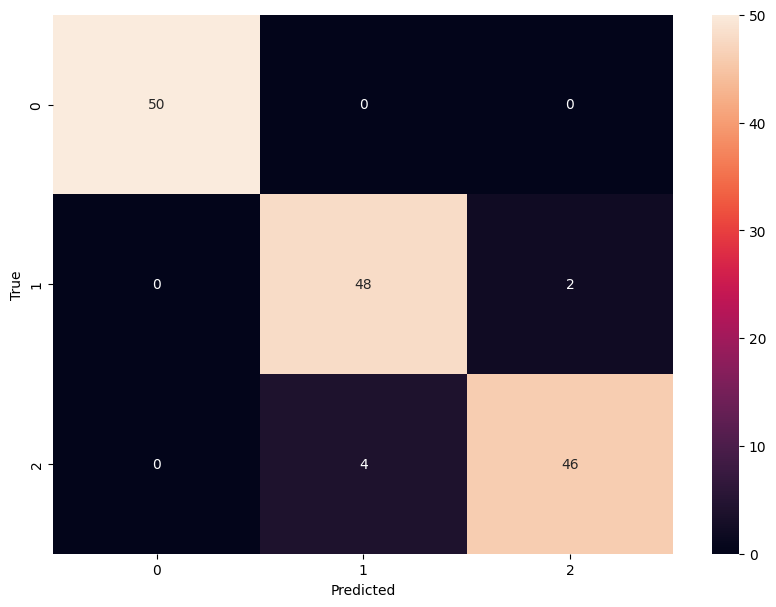

In [12]:
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')